# Outline
- [ 1 - Little theory behind SVM](#1)
- [ 2 - Import Data and brief EDA](#2)
- [ 3 - Feature selection and train custom model](#3)
- [ 4 - Training sklearm model and fine tuning](#4)

SVM and Breast Chancer Dataset
<br> Dataset is provided by [`Kaggle Fake News Competition`](https://www.kaggle.com/competitions/fake-news/data)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from nltk.stem import PorterStemmer
import seaborn as sns

In [150]:
train = pd.read_csv("/Users/sergeiakhmadulin/My Drive/Fake news/train.csv", on_bad_lines='skip',sep=',')
evaluation_data = pd.read_csv("/Users/sergeiakhmadulin/My Drive/Fake news/test.csv", on_bad_lines='skip',sep=',')

In [151]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [167]:
target_names = ["Unreliable", "Reliable"]

In [178]:
label_counts.index

Index([1, 0], dtype='int64', name='label')

In [174]:
# Function to calculate the proportion of 1's and 0's in the target column
def calculate_proportions(df):
    prop_1 = df['label'].mean()  # proportion of 1's
    prop_0 = 1 - prop_1          # proportion of 0's
    return prop_0, prop_1

# Calculate proportions for each dataset
prop_0_train, prop_1_train = calculate_proportions(train)

# Create a DataFrame for plotting
proportions = pd.DataFrame({
    'Real': [prop_0_train],
    'Fake': [prop_1_train]
}, index=['Train'])

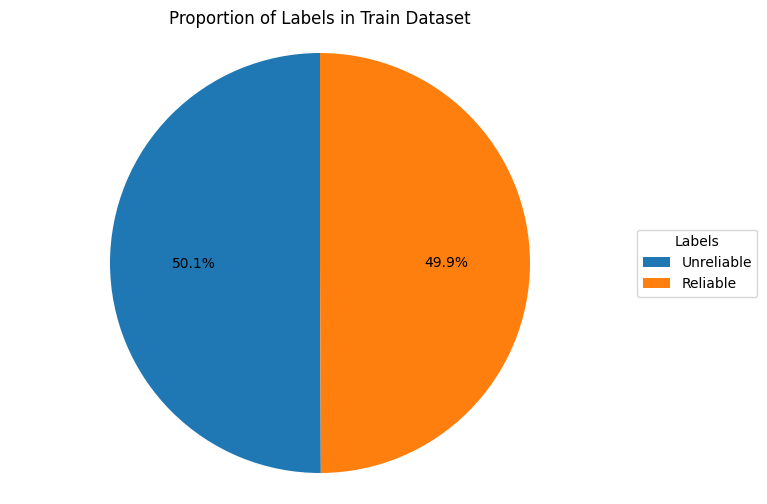

In [189]:
label_counts = train['label'].value_counts()

fig, ax = plt.subplots(figsize=(8,6))
wedges, texts, autotexts = ax.pie(label_counts, autopct='%1.1f%%', startangle=90)

ax.axis('equal')
ax.set_title('Proportion of Labels in Train Dataset')
ax.legend(wedges, target_names, title="Labels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

In [164]:
def plot_words_cloud(data, title):
    text = ' '.join(data)

    # Generate and display the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

In [160]:
train["author"] = train["author"].fillna('unknown')

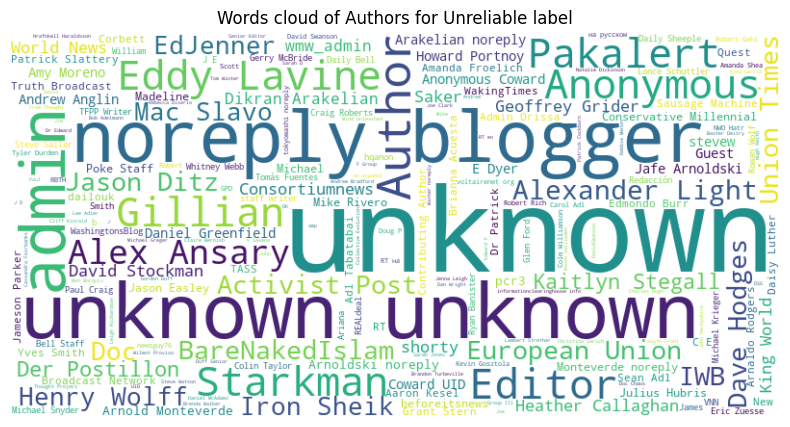

In [170]:
plot_words_cloud(train[train["label"]==1]["author"], "Words cloud of Authors for " + target_names[0] + " label")

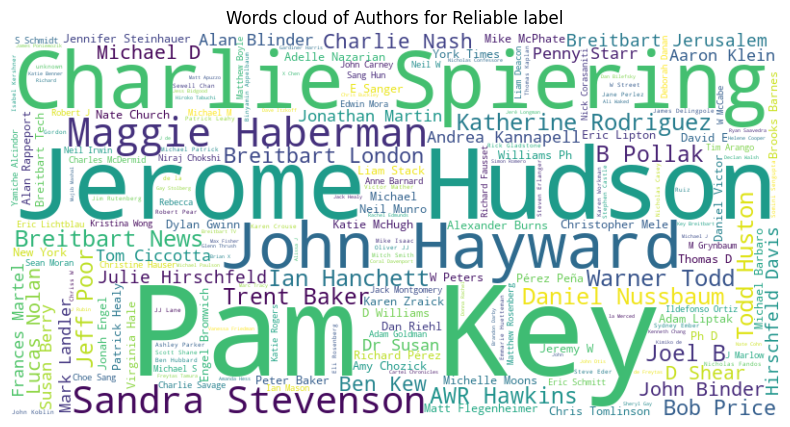

In [169]:
plot_words_cloud(train[train["label"]==0]["author"], "Words cloud of Authors for " + target_names[1] + " label")

In [6]:
def text_prepare(text):
    """
    Function that does a general text preparation

    Parameters:
    text: corpus of text documents

    Output:

    text without spetial characters, "stop words" in lower case and stemmed
    """
    stemmer = PorterStemmer()
    REPLACE_BY_SPACE_RE = re.compile(r'[^a-zA-Z0-9\s]')
    BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
    STOPWORDS = set(stopwords.words('english'))
    text = text.lower()

    text = REPLACE_BY_SPACE_RE.sub(r' ',text)
    text = BAD_SYMBOLS_RE.sub(r'',text)
    text = [stemmer.stem(w) for w in text.split() if not w in STOPWORDS]
    
    return ' '.join(text)

In [7]:
def plot_confusion_matrix(Y_true, Y_pred):
    cm = confusion_matrix(Y_true, Y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=list(proportions.columns), yticklabels=list(proportions.columns))
    
    # Set plot labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

For now let's combine train and validation datasets and use them together in training

In [8]:
train["all_test"] = train['title'] + " " + train["text"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, )

In [10]:
X_train_cleaned = [text_prepare(x) for x in Xtrain_all["all_test"]]
# X_val_cleaned = [text_prepare(x) for x in val["all_test"]]
X_test_cleaned = [text_prepare(x) for x in test["all_test"]]

In [11]:
tfidf = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

In [12]:
X_train_matrix = tfidf.fit_transform(X_train_cleaned)
# X_val_matrix = tfidf.transform(X_val_stemmed)
X_test_matrix = tfidf.transform(X_test_cleaned)

In [16]:
tfidf_reversed_vocab = {i:word for word,i in tfidf.vocabulary_.items()}

In [13]:
y_train = Xtrain_all["label"]
# y_val = val["label"]
y_test = test["label"]

In [25]:
svm_model = SVC(kernel='linear', random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
}
svm_model = LinearSVC(random_state=42, max_iter=10000)
grid_search_SVM = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1, verbose = 1)
grid_search_SVM.fit(X_train_matrix, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LinearSVC(max_iter=10000, random_state=42),
             n_jobs=-1, param_grid={'C': [0.1, 1, 10, 100]},
             scoring='precision', verbose=1)

In [26]:
best_svm_model = grid_search_SVM.best_estimator_

y_pred = best_svm_model.predict(X_test_matrix)

# Classification report to evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3753
           1       0.98      0.98      0.98      4364

    accuracy                           0.98      8117
   macro avg       0.98      0.98      0.98      8117
weighted avg       0.98      0.98      0.98      8117



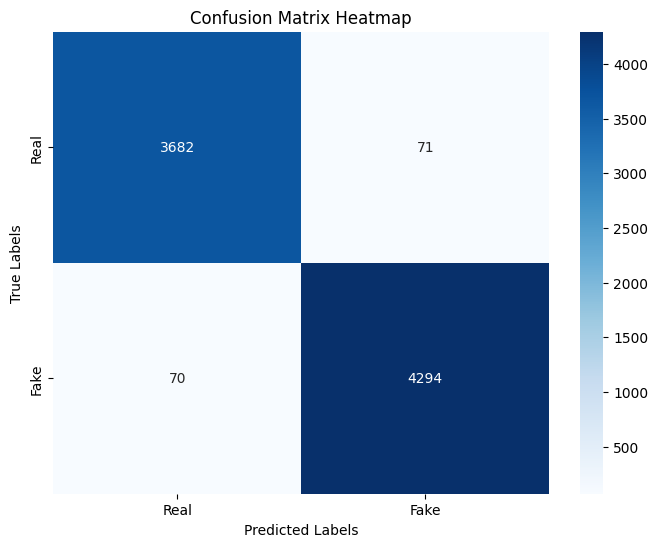

In [27]:
plot_confusion_matrix(y_test, y_pred)

In [28]:
nb_model = MultinomialNB()
nb_model.fit(X_train_matrix, y_train)

# Make predictions on the test set
y_pred_NB = nb_model.predict(X_test_matrix)

In [29]:
print("Classification Report:\n", classification_report(y_test, y_pred_NB))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.90      3753
           1       0.88      0.97      0.93      4364

    accuracy                           0.92      8117
   macro avg       0.92      0.91      0.91      8117
weighted avg       0.92      0.92      0.92      8117



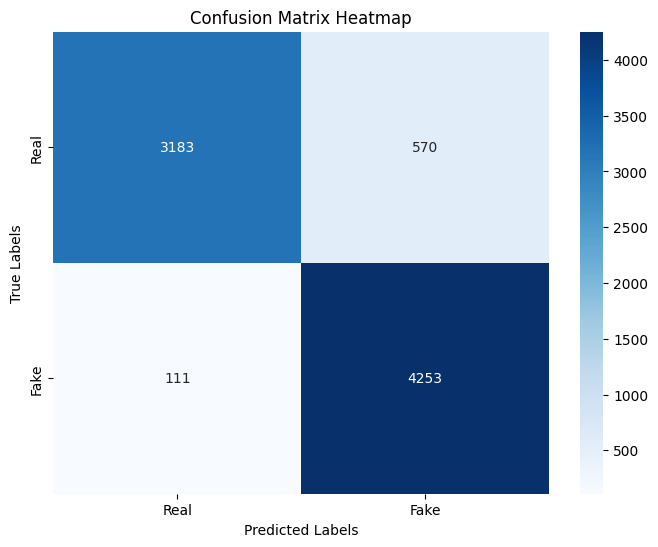

In [30]:
plot_confusion_matrix(y_test, y_pred_NB)

In [33]:
param_grid_LR = {
    'C': [0.001, 0.01, 0.1, 1, 10],            # Regularization strength
    'penalty': ['l2', 'l1'],                   # Regularization type
    'solver': ['liblinear']            # Solvers
}

grid_search_LR = GridSearchCV(LogisticRegression(), param_grid_LR, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search_LR.fit(X_train_matrix, y_train)

best_lr_model = grid_search_LR.best_estimator_

# Make predictions with the tuned model
y_pred_LR = best_lr_model.predict(X_test_matrix)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [34]:
print("Classification Report:\n", classification_report(y_test, y_pred_LR))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      3753
           1       0.98      0.99      0.99      4364

    accuracy                           0.99      8117
   macro avg       0.99      0.99      0.99      8117
weighted avg       0.99      0.99      0.99      8117



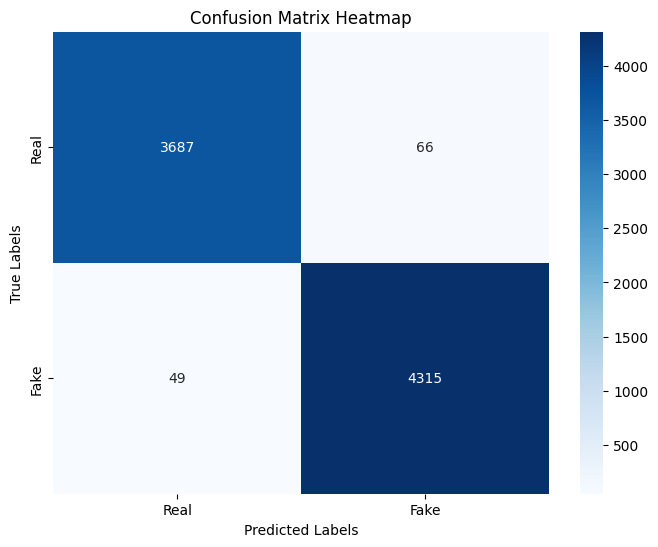

In [35]:
plot_confusion_matrix(y_test, y_pred_LR)

In [77]:
article = """
World Leaders Agree to Use AI for Global Peace in Historic Summit

In a groundbreaking summit, world leaders from over 150 countries gathered in Geneva today to agree on using artificial intelligence (AI) as a tool for global peace. The United Nations-hosted event focused on leveraging AI to prevent conflicts, address climate change, and improve human rights.

A key initiative unveiled at the summit is the creation of a global AI task force to mediate disputes, predict conflicts, and suggest peaceful solutions. Experts also presented "virtual peacekeepers"—AI systems designed to de-escalate tensions before they turn violent.

While the proposal was met with optimism, critics voiced concerns over AI’s potential misuse. "AI must be used responsibly and ethically," warned Dr. Elizabeth Yara, an ethicist at the summit.

Despite the risks, the event ended with a commitment from countries and tech companies to develop AI systems that promote peace and cooperation, with hopes that this technology will play a central role in resolving future global challenges.

Disclaimer: This article is fictional and for entertainment purposes.
"""

In [80]:
article = text_prepare(article)
article_tfidf = tfidf.transform([article])
best_lr_model.predict(article_tfidf)

In [138]:
train[train["label"]==1]["all_test"][1]

"China says Trump call with Taiwan president won't change island's status BEIJING (Reuters) - U.S. President-elect Donald Trump’s call with Taiwan President Tsai Ing-wen was a “petty” move by Taiwan that does not change its status as part of China, China’s Taiwan Affairs Office said on Saturday. China will “unswervingly” stick to its position of opposing Taiwan independence, it said, in a statement released on the official Xinhua news agency. "

In [145]:
real_news_article = """
Over the years, the two nations displayed remarkable camaraderie, marked with timely intervention and aid in times of need and calamity.

When Super Typhoon Yolanda (Haiyan), unleashed its fury and tore through the Visayas in 2013, Türkiye was among the first countries to arrive and extend help.

Even before the extent of damage was determined at that time, Turkish Prime Minister Recep Tayyip Erdoğan issued an immediate order for aid teams to provide rescue support.

As recalled by Turkish Ambassador Niyazi Evren Akyol, communities remember the Turkish compassion to this day.

“Turkish teams stayed there for months on end with aid, helping people directly. And I have met many people still remembering from the region and praising and expressing gratitude for our efforts,” he told the Philippine News Agency in a recent interview.

Last year, the Philippines reciprocated this and was quick to lend assistance when a 7.8 magnitude earthquake struck Türkiye and left a trail of destruction and thousands of deaths.

Amid the freezing temperature in the quake-hit communities, an 82-member Philippine rescue team flew to Türkiye to assist in rescue and recovery operations.

Beyond immediate relief, Türkiye also supported efforts to foster long-term growth in the country by financing “high-impact” projects in various regions.

Since establishing its office in the country, the Turkish Cooperation and Coordination Agency has completed around USD6 million in aid programs -- skill-building and human resource-building projects, renovation of schools, and provision of medical, agricultural and educational equipment.

As the two nations mark 75 years of diplomatic relations this year, Akyol offers an optimistic look into the Philippine-Türkiye ties in the future.

“This is an old relationship -- a longstanding and strong relationship. We have a history of helping each other in dark times, especially as both our countries are very much disaster-prone,” he said.

“A measure of friendship is how you help each other during these times and we consider our activity here, our relationship with the Philippines, as a long-term relationship with great potential,” he added.

The envoy also reaffirmed Türkiye’s continuing support for the peace efforts in Mindanao.

An international expert from Türkiye currently chairs the Independent Decommissioning Body Board, which was created by the Philippine government and the Moro Islamic Liberation Front to oversee the process of decommissioning of forces and weapons in the Bangsamoro region.

It is a key component of the normalization structure in accordance with the Comprehensive Agreement on the Bangsamoro.

“When all the items in the peace agreement and the related laws are fully implemented, we will continue to support the strengthening of the peace as a permanent, resilient state of affairs,” Akyol said.

“The stability of the Philippines is essential for the stability of this region. And the stability of this region is essential for the stability of the whole world,” he added.

The Philippines is Türkiye’s oldest diplomatic partner in Southeast Asia, with relations formally established when the two signed the Treaty of Friendship on June 13, 1949.

On top of development and peace, the two states have also seen increased engagement in the fields of education, defense, and especially economy with more and more Turkish companies increasingly taking interest in the country.
"""

In [146]:
real_article = text_prepare(real_news_article)
article_real_tfidf = tfidf.transform([real_article])
best_lr_model.predict(article_real_tfidf)

array([0])

In [86]:
best_lr_model.predict_proba(article_real_tfidf)

array([[0.82705984, 0.17294016]])

In [57]:
min = np.argsort(best_lr_model.coef_[0])[:5]

In [62]:
np.argsort(best_lr_model.coef_[0])[-5:][::-1]

array([2185206, 2794411, 2039394,  695734, 1758618])

In [63]:
best_lr_model.coef_[0][1758618]

56.87108587709695

In [68]:
tfidf_reversed_vocab[1758618]

'novemb pm'

In [170]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, LSTM, Dropout

In [162]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_cleaned)

In [163]:
X_train_seq = tokenizer.texts_to_sequences(X_train_cleaned)
X_test_seq = tokenizer.texts_to_sequences(X_test_cleaned)

In [164]:
X_train_pad = pad_sequences(X_train_seq, padding='post', maxlen=200)
X_test_pad = pad_sequences(X_test_seq, padding='post', maxlen=200)

In [166]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [167]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=16, validation_data=(X_test_pad, y_test))

Epoch 1/5
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8985 - loss: 0.2177 - val_accuracy: 0.9738 - val_loss: 0.0699
Epoch 2/5
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9854 - loss: 0.0438 - val_accuracy: 0.9757 - val_loss: 0.0670
Epoch 3/5
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9960 - loss: 0.0134 - val_accuracy: 0.9686 - val_loss: 0.1159
Epoch 4/5
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9983 - loss: 0.0069 - val_accuracy: 0.9734 - val_loss: 0.1065
Epoch 5/5
2030/2030 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9981 - loss: 0.0069 - val_accuracy: 0.9736 - val_loss: 0.1356


254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9725 - loss: 0.1433
Test Accuracy: 97.36%


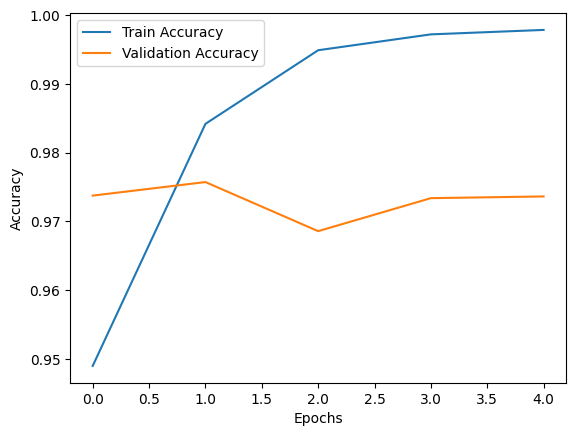

254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3753
           1       0.97      0.98      0.98      4364

    accuracy                           0.97      8117
   macro avg       0.97      0.97      0.97      8117
weighted avg       0.97      0.97      0.97      8117



In [168]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot the training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions and print classification report
y_pred = model.predict(X_test_pad)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

In [172]:
model = Sequential()

# Embedding layer to convert integer sequences to dense vectors
model.add(Embedding(input_dim=5000, output_dim=128))

# LSTM layer to capture sequential dependencies in text
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

# Dense layer for final classification
model.add(Dense(1, activation='sigmoid'))

# Model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [173]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [174]:
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test))

Epoch 1/5
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - accuracy: 0.8466 - loss: 0.3645 - val_accuracy: 0.9490 - val_loss: 0.1632
Epoch 2/5
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.9369 - loss: 0.1897 - val_accuracy: 0.9608 - val_loss: 0.1264
Epoch 3/5
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.9657 - loss: 0.1041 - val_accuracy: 0.9683 - val_loss: 0.0901
Epoch 4/5
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.9792 - loss: 0.0665 - val_accuracy: 0.9725 - val_loss: 0.0771
Epoch 5/5
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 80s 79ms/step - accuracy: 0.9853 - loss: 0.0462 - val_accuracy: 0.9749 - val_loss: 0.0780


254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9784 - loss: 0.0724
Test Accuracy: 97.49%


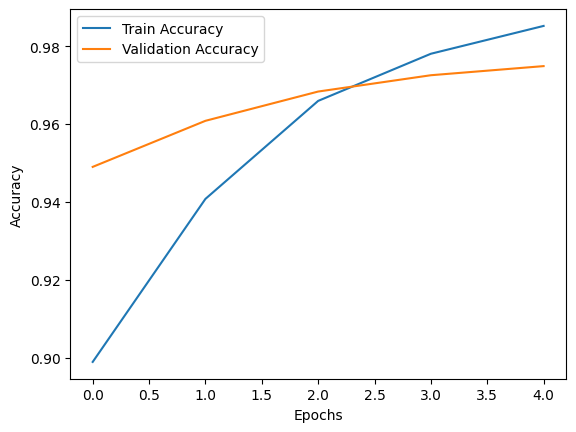

254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3753
           1       0.98      0.98      0.98      4364

    accuracy                           0.97      8117
   macro avg       0.97      0.97      0.97      8117
weighted avg       0.97      0.97      0.97      8117



In [175]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot the training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Make predictions and print classification report
y_pred = model.predict(X_test_pad)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))

In [ ]:
from transformers import AutoTokenizer

# Load a pre-trained tokenizer (you can choose a different model)
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Example text to tokenize
text = "Hugging Face provides an awesome library for NLP."

# Tokenize the text
tokens = tokenizer.tokenize(text)

# Print the tokens
print(tokens)

In [ ]:
pip install transformers torch